MGTA 452 : GROUP A - Panchami Shanbhag, Bindu Achalla, Siddharth Godwani, Zisen Li

## FAKE JOB LISTING ANALYSIS

PROBLEM STATEMENT

This project aims to create distinctions that will have the potential to identify fake and real jobs. The final result is analyzed based on two different models. Since the data provided has numerical and textual features, one model will be used for text data and the other for numerical data. The end result will be a combination of the two. The final model will capture any relevant job data and generate final results that determines whether the job posted is real or fake.

## Exploratory Analysis

In [13]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Bindu Priyanka\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Bindu Priyanka\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [15]:
import re
import string
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report,confusion_matrix, roc_auc_score
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [16]:
df=pd.read_csv("fake_job_postings.csv")

In [17]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [18]:
df.shape

(17880, 18)

Let's check how many columns have null values - data cleaning

In [19]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

Drop columns with redundant values

In [20]:
df.drop(["job_id","telecommuting","salary_range"],axis=1,inplace=True)

In [21]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [22]:
jobposts_df = df.copy()
jobposts_df.head()

,title,location,department,company_profile,description,requirements,benefits,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Exploratory Analysis and Visualization

Compare fraudulent and non-fraudulent job postings

Non-fraudulent = 0, Fraudulent = 1

C:\Users\Bindu Priyanka\AppData\Local\Temp\ipykernel_25128\3939982056.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Non-Fraudulent', 'Fraudulent'], rotation=0)


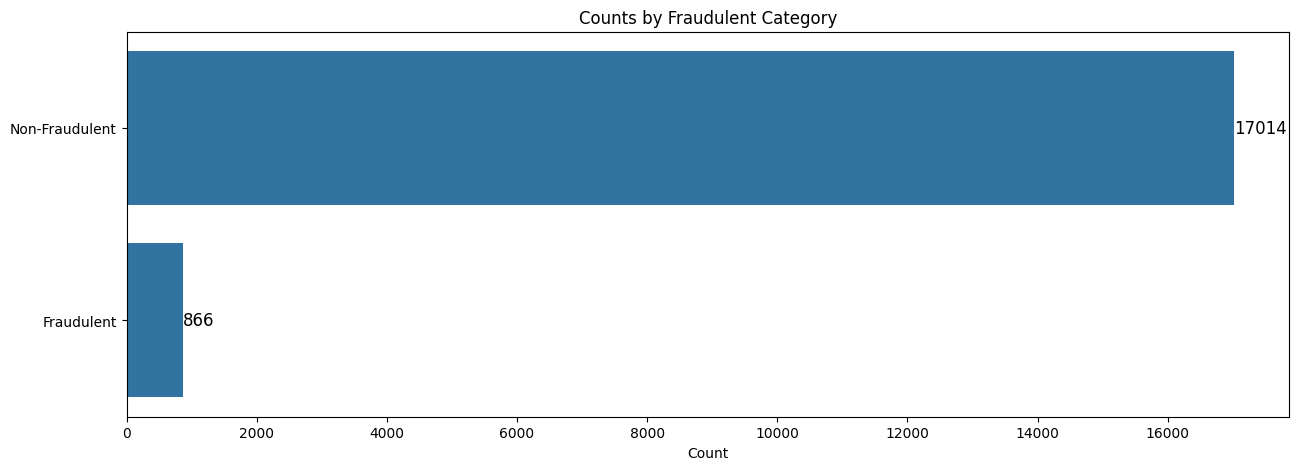

In [23]:
plt.figure(figsize=(15,5))
ax = sns.countplot(y="fraudulent", data=jobposts_df)
counts = jobposts_df.groupby("fraudulent")["fraudulent"].count()
ax.set_yticklabels(['Non-Fraudulent', 'Fraudulent'], rotation=0)

for i, v in enumerate(counts):
    ax.annotate(f'{v}', (v, i), ha='left', va='center', fontsize=12, color='black')

plt.title("Counts by Fraudulent Category")
plt.xlabel("Count")
plt.ylabel("")
plt.show()

## 17,014 jobs are non-fraudulent while 866 jobs are fraudulent

It appears that number of fake jobs are significantly low, under 2000, with respect to real ones where there are more than 16000 job postings

Let's visualize the total number of jobs posted and the experience expected for a particular candidate

In [24]:
exp=dict(jobposts_df.required_experience.value_counts())

C:\Users\Bindu Priyanka\AppData\Local\Temp\ipykernel_25128\2246873666.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(exp.keys()), y=list(exp.values()), palette="Greens")


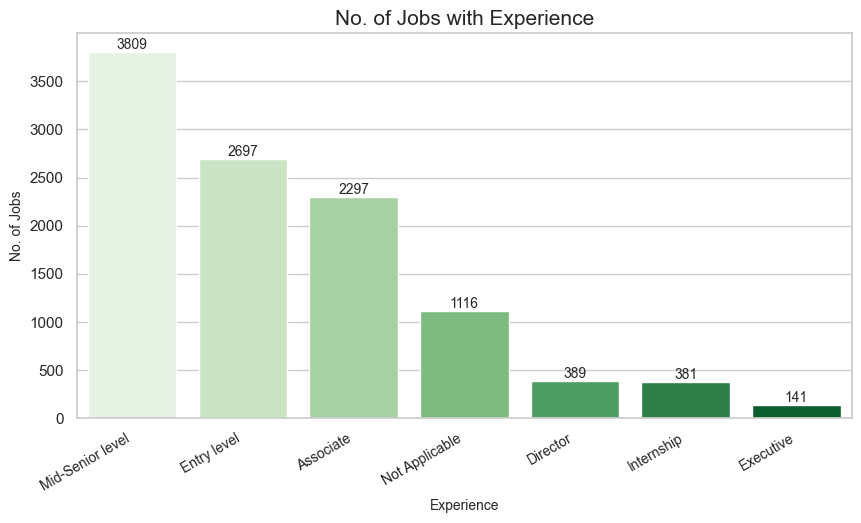

In [25]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=list(exp.keys()), y=list(exp.values()), palette="Greens")

for i, v in enumerate(exp.values()):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

plt.title("No. of Jobs with Experience",size=15)
plt.xlabel("Experience",size=10)
plt.ylabel("No. of Jobs",size=10)
plt.xticks(rotation=30, fontsize=10, ha='right', va='top')
plt.show()

3809 job postings were mostly targeted towards a Mid-Senior level work experience followed by entry level and so

Let's visualize how many jobs were fake amongst them

In [26]:
fraudulent_df = jobposts_df[jobposts_df['fraudulent'] == 1]

fraudulent_counts = dict(fraudulent_df.required_experience.value_counts())


C:\Users\Bindu Priyanka\AppData\Local\Temp\ipykernel_25128\3016607125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(fraudulent_counts.keys()), y=list(fraudulent_counts.values()), palette="pastel")


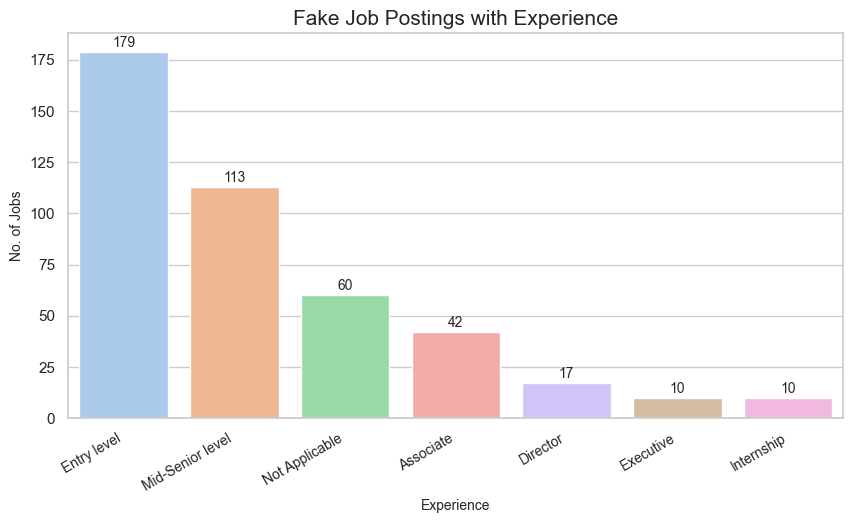

In [27]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=list(fraudulent_counts.keys()), y=list(fraudulent_counts.values()), palette="pastel")

for i, v in enumerate(fraudulent_counts.values()):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

plt.title("Fake Job Postings with Experience",size=15)
plt.xlabel("Experience",size=10)
plt.ylabel("No. of Jobs",size=10)
plt.xticks(rotation=30, fontsize=10, ha='right', va='top')
plt.show()

The fake postings were mostly for Entry level jobs which was 179 out of 2697 followed by Mid-Senior level and so on

Let's visualize the job postings based on Top 10 industries

In [28]:
sector = dict(jobposts_df.industry.value_counts()[:11])

C:\Users\Bindu Priyanka\AppData\Local\Temp\ipykernel_25128\1308790757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(sector.keys()), y=list(sector.values()), palette="magma")


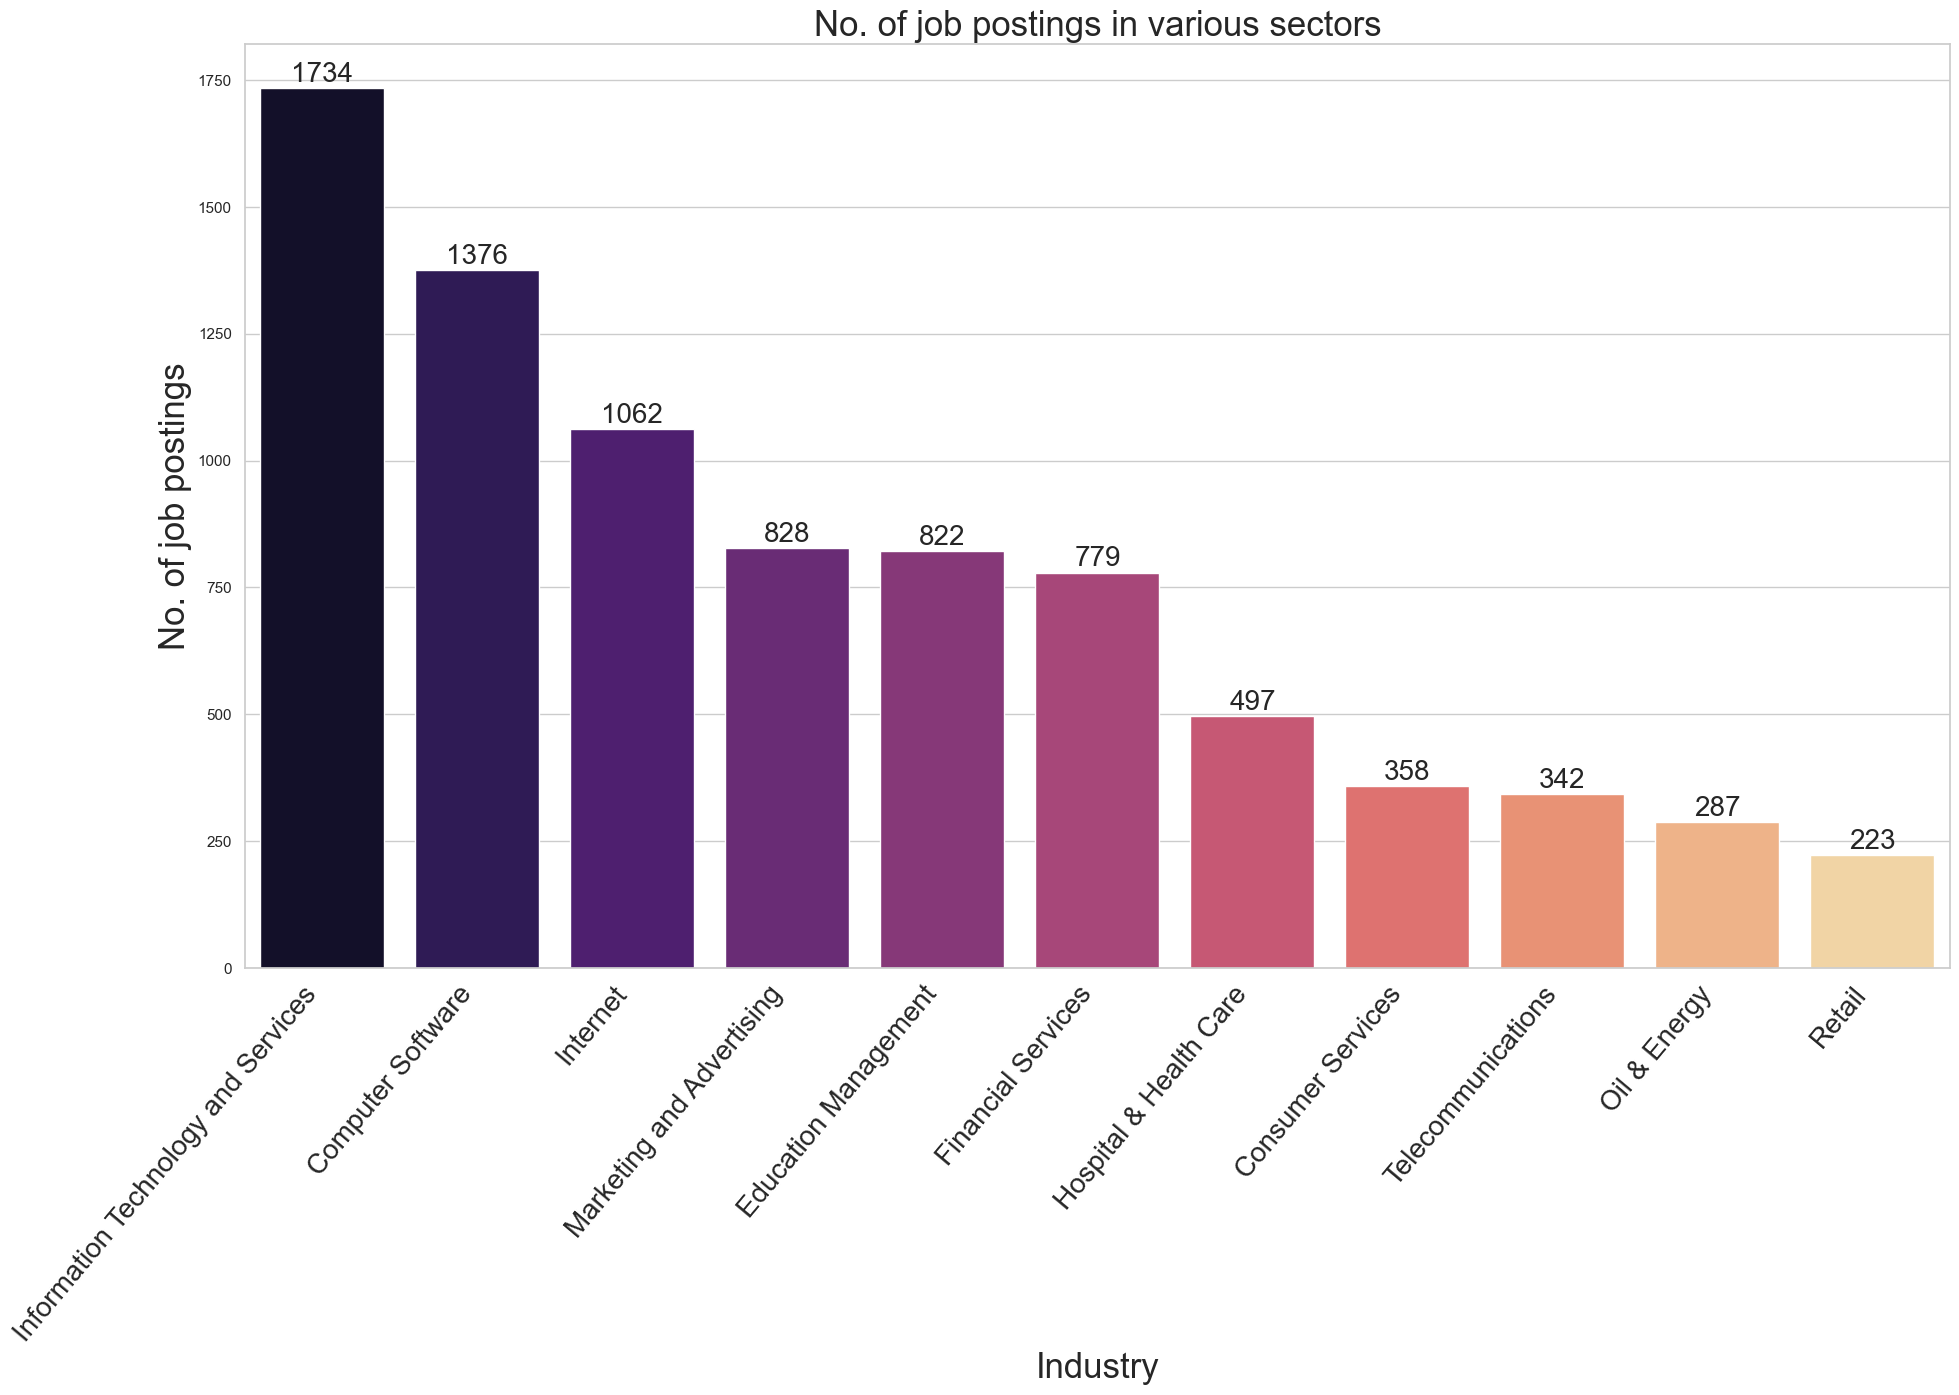

In [29]:
plt.figure(figsize=(22,12))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=list(sector.keys()), y=list(sector.values()), palette="magma")

for i, v in enumerate(sector.values()):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=20)

plt.title("No. of job postings in various sectors",size=25)
plt.xlabel("Industry",size=25)
plt.ylabel("No. of job postings",size=25)
plt.xticks(rotation=50, fontsize=20, ha='right', va='top')
plt.show()

1734 job postings were mainly directed towards individuals seeking jobs in the information technology and services sector

Let's visualize the number of fraudulent job postings in top 10 industries

In [30]:
fraudulent_counts_ind = dict(fraudulent_df.industry.value_counts()[:11])

C:\Users\Bindu Priyanka\AppData\Local\Temp\ipykernel_25128\3184342788.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(fraudulent_counts_ind.keys()), y=list(fraudulent_counts_ind.values()), palette="coolwarm")


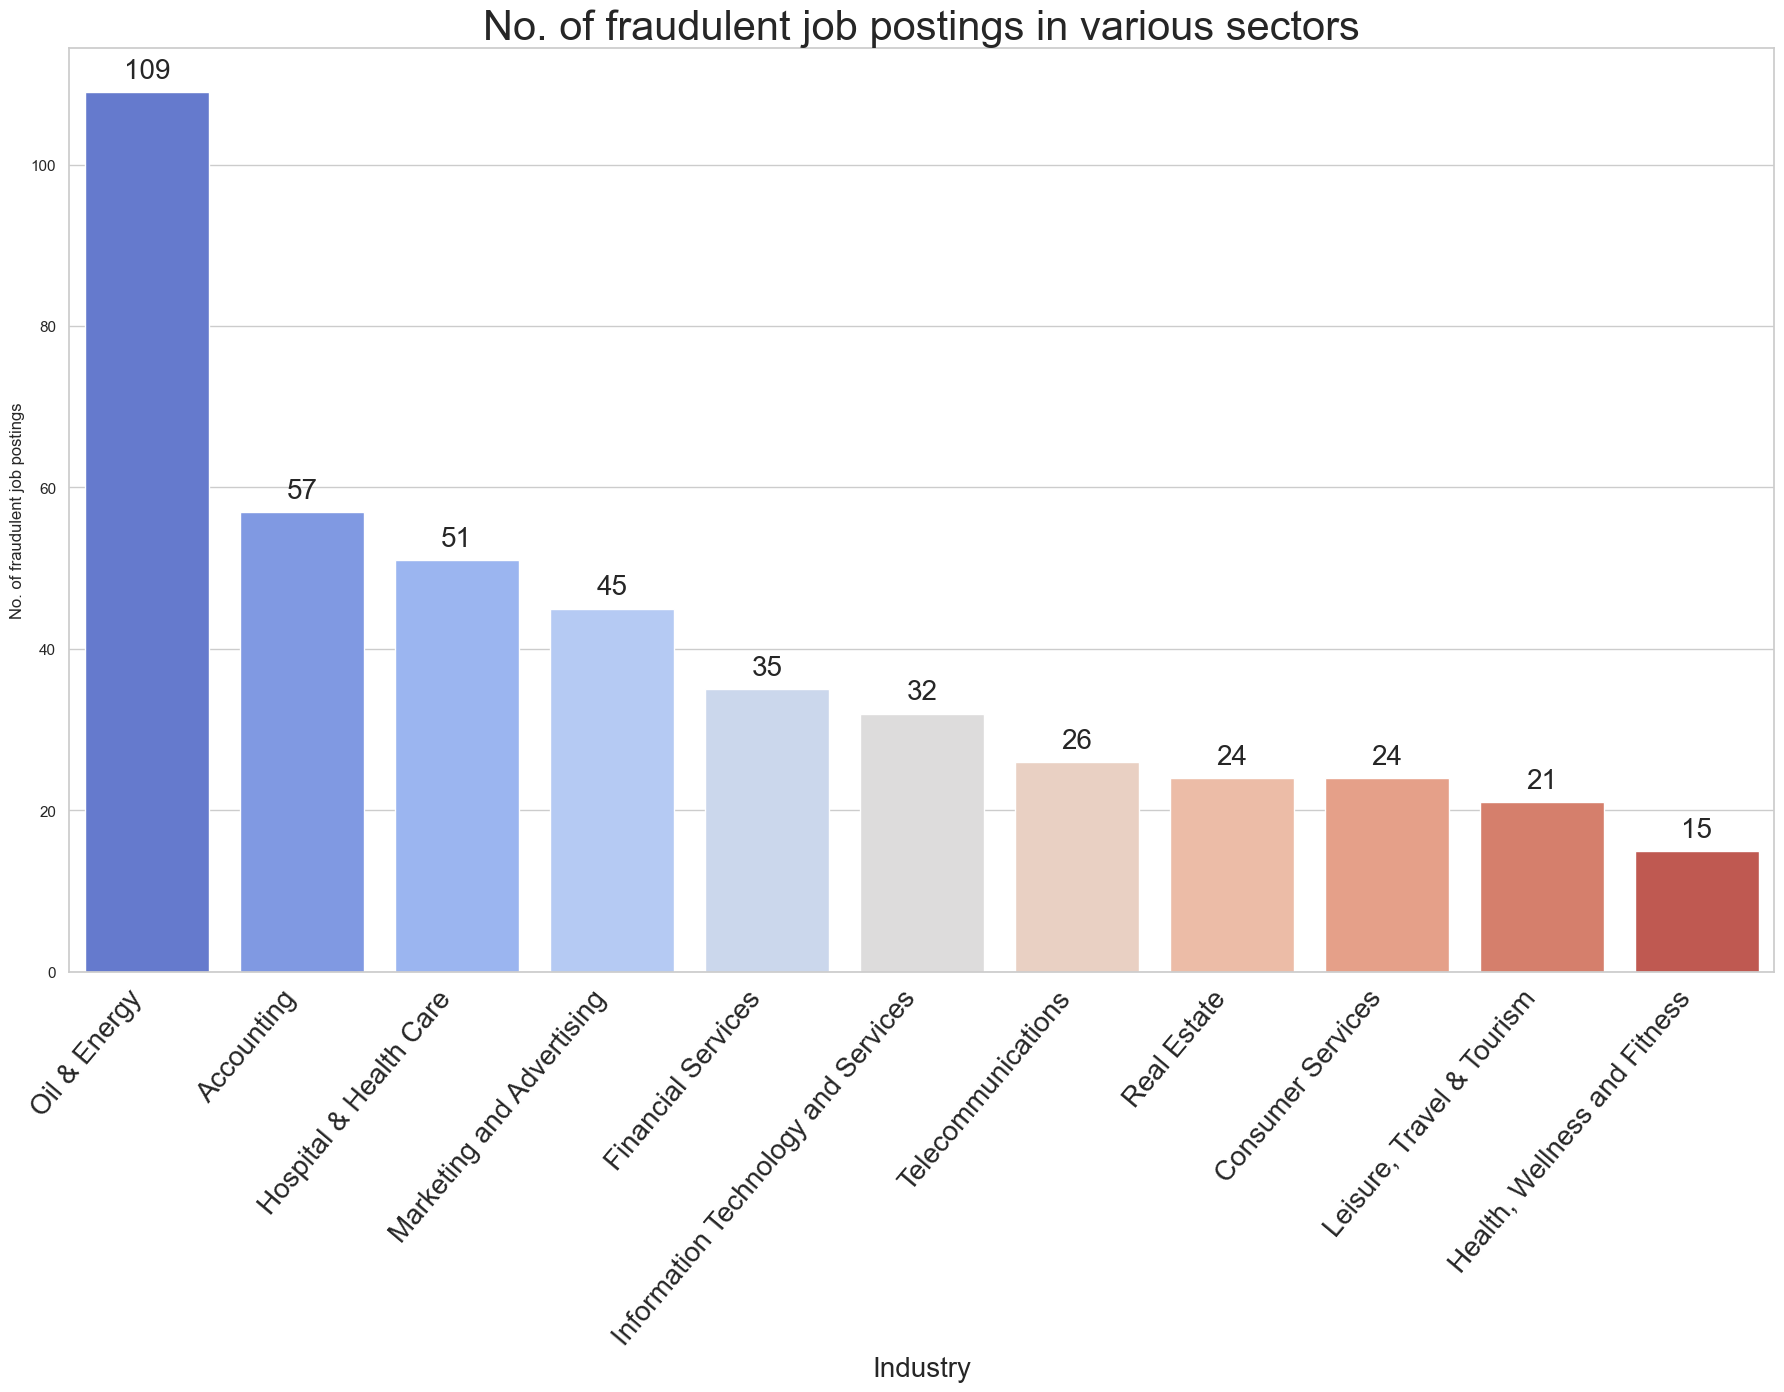

In [31]:
plt.figure(figsize=(22,12))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=list(fraudulent_counts_ind.keys()), y=list(fraudulent_counts_ind.values()), palette="coolwarm")
for i, v in enumerate(fraudulent_counts_ind.values()):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=20)

plt.title("No. of fraudulent job postings in various sectors",size=30)
plt.xlabel("Industry",size=20)
plt.ylabel("No. of fraudulent job postings")
plt.xticks(rotation=50, fontsize=20, ha='right', va='top')
plt.show()

Looking at these industries, Oil & Energy, accounting, health care and marketing industries are at the top.

Let's look at fake job postings according to emplyment types.

In [32]:
employment_type = jobposts_df.groupby(['employment_type'])[['fraudulent']].sum()

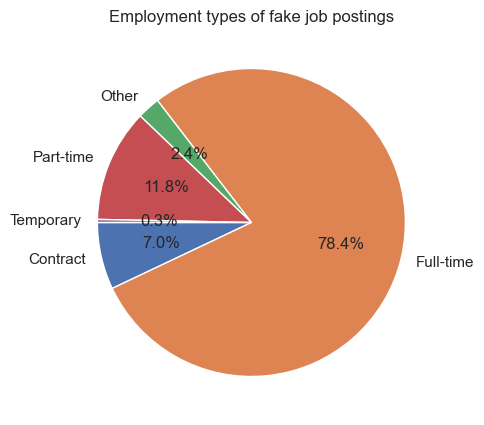

In [33]:
plt.figure(figsize=(15,5))
plt.title("Employment types of fake job postings")
plt.pie(employment_type.fraudulent, labels=employment_type.index, autopct='%1.1f%%', startangle=180);

It appears that 78.4% of fake job posts are full-time and 11.8% are part-time. 

Only 625 job posts have an employment type, the rest 241 job posts have not specified employment types.

Let's visualize the number of jobs that was offered without any questions asked

In [34]:
qs=dict(jobposts_df.has_questions.value_counts())
qs

{0: 9088, 1: 8792}

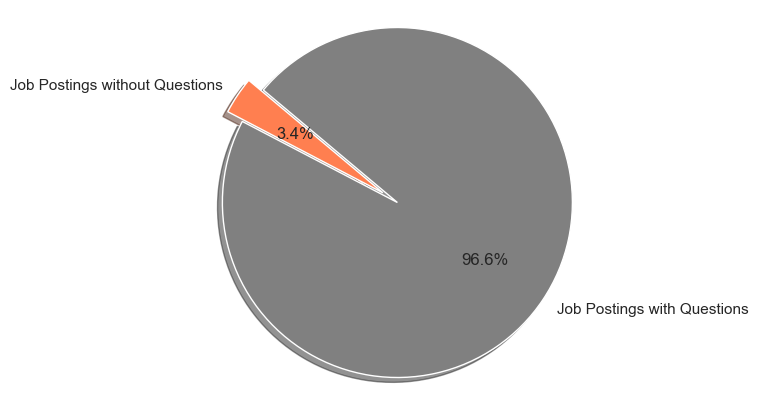

In [35]:
fake_without_questions = jobposts_df[(jobposts_df['fraudulent'] == 1) & (jobposts_df['has_questions'] == 0)]
fake_without_questions_counts = fake_without_questions['fraudulent'].value_counts()

plt.figure(figsize=(6, 5))
labels = ['Job Postings without Questions', 'Job Postings with Questions']
sizes = [fake_without_questions_counts[1], len(jobposts_df) - fake_without_questions_counts[1]]
colors = ['coral', 'gray']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

3.4% of these postings gave jobs to candidates without even asking a single question

(A vital indicator of a fake posting)

Let's visualize the number of jobs posted based on countries - Top 13

In [36]:
def split(location):
    if isinstance(location, str):
        l = location.split(',')
        return l[0]
    else:
        return 
jobposts_df["Country"]=jobposts_df.location.apply(split)

In [37]:
countr=dict(jobposts_df.Country.value_counts()[:14])

C:\Users\Bindu Priyanka\AppData\Local\Temp\ipykernel_25128\2844281609.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(countr.keys()), y=list(countr.values()), palette="plasma")


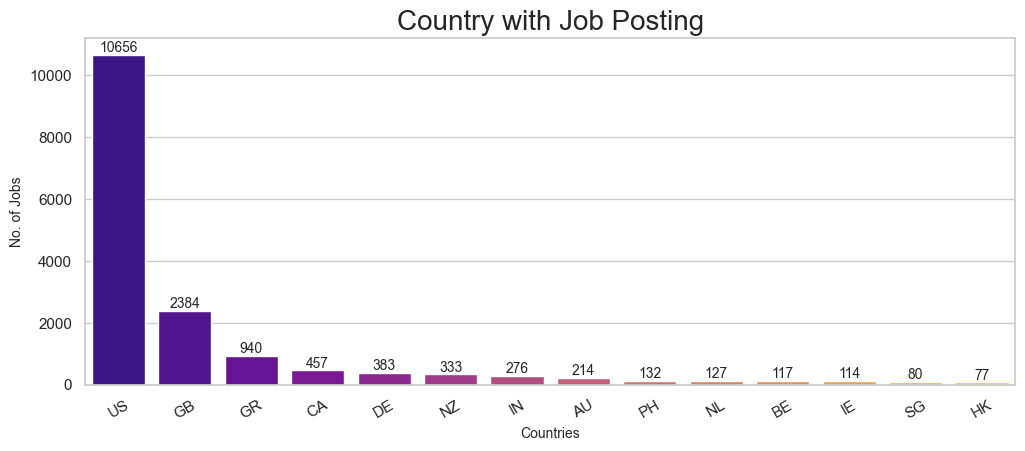

In [38]:
plt.figure(figsize=(12,4.5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=list(countr.keys()), y=list(countr.values()), palette="plasma")

for i, v in enumerate(countr.values()):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

plt.title("Country with Job Posting",size=20)
plt.xlabel("Countries",size=10)
plt.ylabel("No. of Jobs",size=10)
plt.xticks(rotation=30)
plt.show()

The job postings were mostly in the United States which accounted to almost 10,656, followed by the United Kingdom of Great Britain which was 2384, Greece, Canada, and so on.

Let's visualize the number of fake jobs posted based on countries - Top 13

In [39]:
fraudulent_df = jobposts_df[jobposts_df['fraudulent'] == 1]
fake_countr=dict(fraudulent_df.Country.value_counts()[:14])

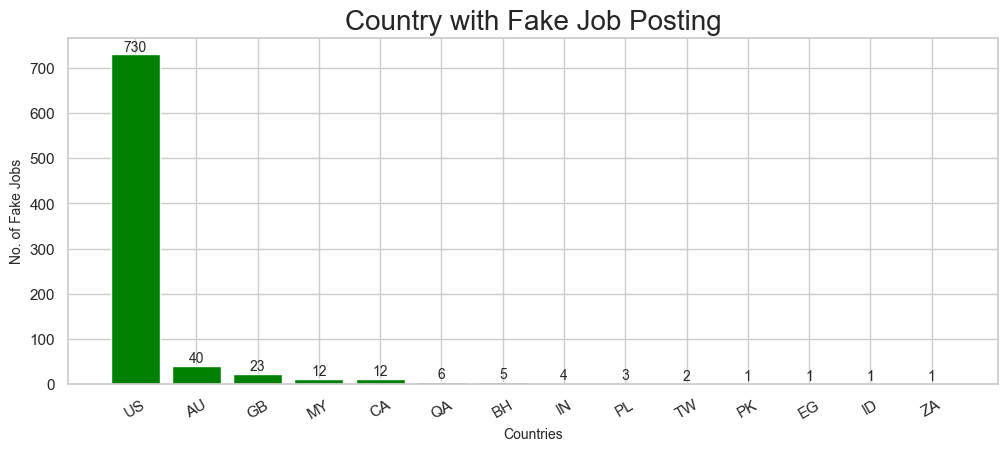

In [40]:
plt.figure(figsize=(12,4.5))
sns.set_theme(style="whitegrid")
ax = plt.bar(fake_countr.keys(),fake_countr.values(), color="green")

for i, v in enumerate(fake_countr.values()):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

plt.title("Country with Fake Job Posting",size=20)
plt.xlabel("Countries",size=10)
plt.ylabel("No. of Fake Jobs",size=10)
plt.xticks(rotation=30)
plt.show()

The fake postings were mostly in the United States which accounted to almost 730, followed by Australia and so on

Let's visualize the number of fake jobs posted in different cities - Top 10

In [41]:
def split(location):
    if isinstance(location, str):
        l = location.split(',')
        return l[0].strip(), l[-1].strip()
    else:
        return '', ''

# Apply the split function to create new "City" and "Country" columns
jobposts_df[["Country", "City"]] = jobposts_df.location.apply(split).apply(pd.Series)
jobposts_df.head()

,title,location,department,company_profile,description,requirements,benefits,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Country,City
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,1,0,Other,Internship,NaN,NaN,Marketing,0,US,New York
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ,Auckland
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,1,0,NaN,NaN,NaN,NaN,NaN,0,US,Wever
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,Washington
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,Fort Worth


In [42]:
fraudulent_df = jobposts_df[jobposts_df['fraudulent'] == 1]
fake_cities = dict(fraudulent_df['City'].value_counts()[:14])
del fake_cities[""]

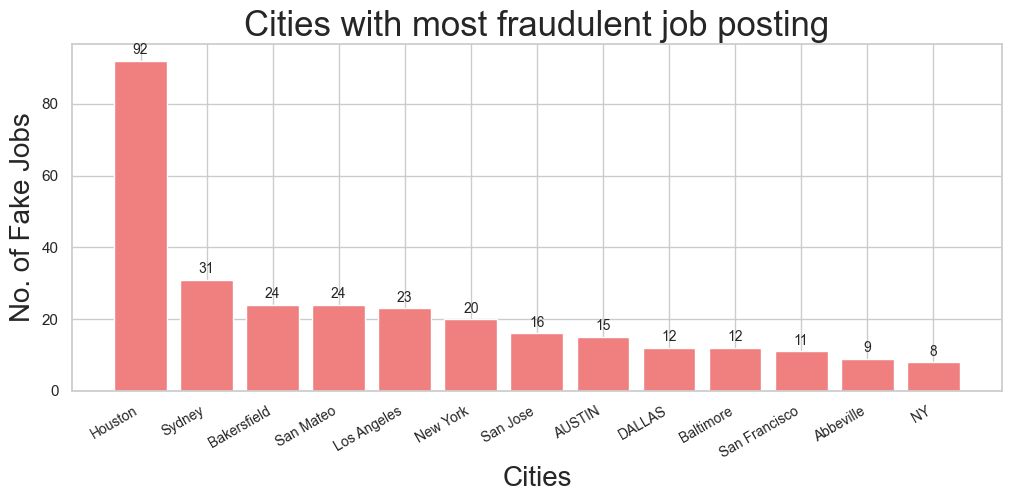

In [43]:
plt.figure(figsize=(12,4.5))
sns.set_theme(style="whitegrid")
ax = plt.bar(fake_cities.keys(),fake_cities.values(), color="lightcoral")

for i, v in enumerate(fake_cities.values()):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

plt.title("Cities with most fraudulent job posting",size=25)
plt.xlabel("Cities",size=20)
plt.ylabel("No. of Fake Jobs",size=20)
plt.xticks(rotation=30, fontsize=10, ha='right', va='top')
plt.show()

Houston(US) has the highest fraudulent job postings followed by Syndney(Australia) and other cities of the US

Let's see if having a company logo mean something.

In [44]:
company_logo = jobposts_df.groupby(['has_company_logo'])[['fraudulent']].sum()

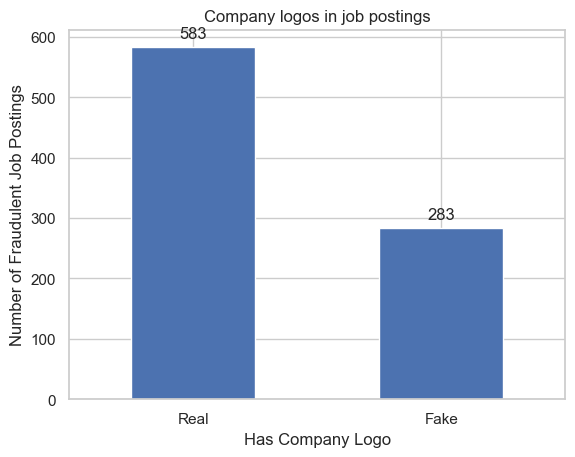

In [45]:
ax = company_logo.plot(kind='bar', title='Company logos in job postings', legend=False)
plt.xlabel('Has Company Logo')
plt.ylabel('Number of Fraudulent Job Postings')
ax.set_xticklabels(['Real', 'Fake'], rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Around 283 fake job postings do not have a company logo, whereas, around 583 postings are with logo. 

Having a company logo does not relate to job postings genuinity, since job postings by themselves might be false.

Let's visualize the number of jobs posted for top 6 education levels

In [46]:
edu=dict(jobposts_df.required_education.value_counts()[:7])

C:\Users\Bindu Priyanka\AppData\Local\Temp\ipykernel_25128\2385581880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(edu.keys()), y=list(edu.values()), palette="YlGn")


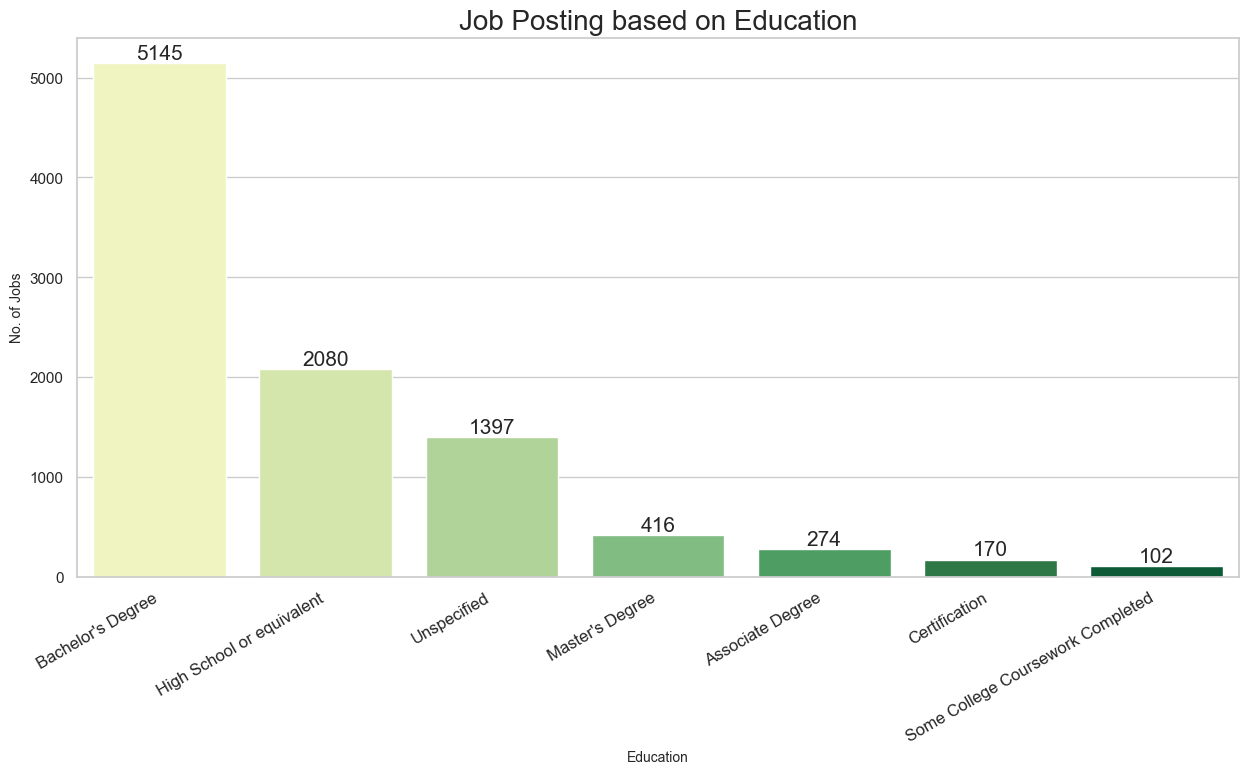

In [47]:
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=list(edu.keys()), y=list(edu.values()), palette="YlGn")

for i, v in enumerate(edu.values()):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=15)

plt.title("Job Posting based on Education",size=20)
plt.xlabel("Education",size=10)
plt.ylabel("No. of Jobs",size=10)
plt.xticks(rotation=30, fontsize=12, ha='right', va='top')
plt.show()

5145 job postings were mostly targeted towards a Bachelor’s degree

Let's visualize how many are fake

In [48]:
fake_edu=dict(fraudulent_df.required_education.value_counts()[:7])

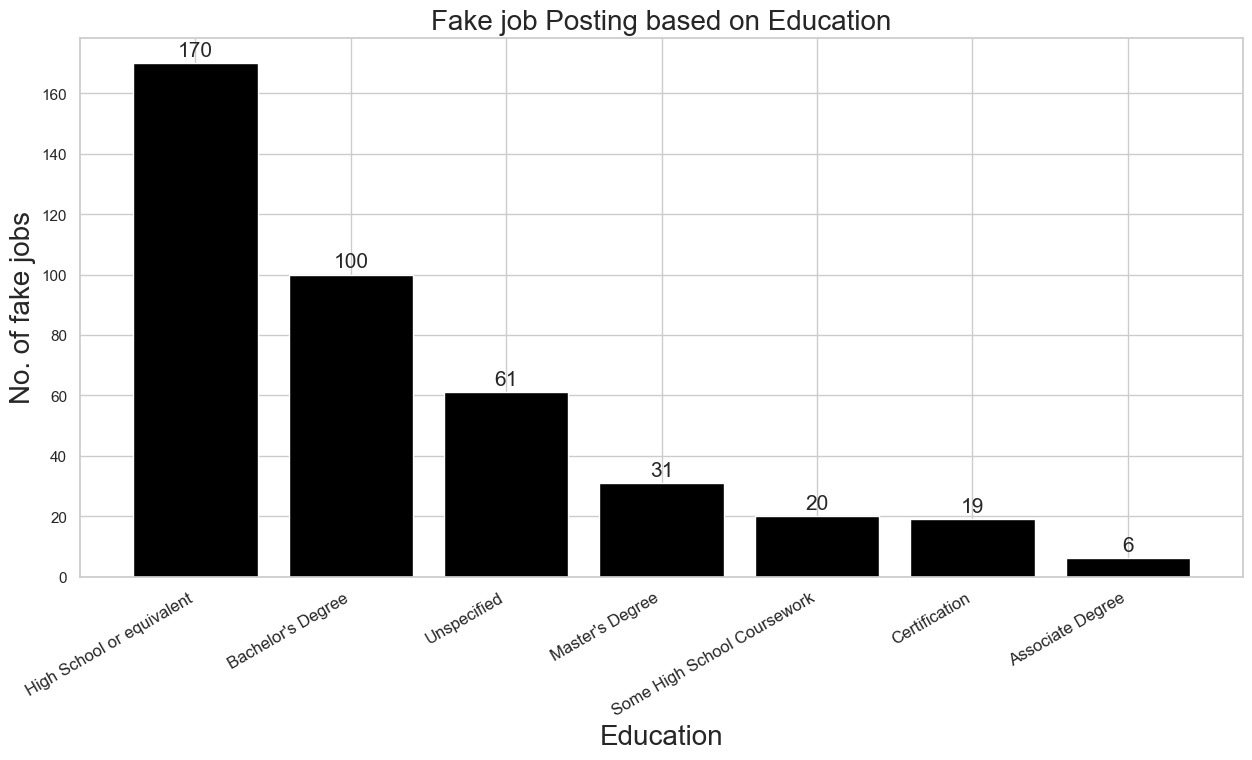

In [49]:
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")
ax = plt.bar(fake_edu.keys(),fake_edu.values(), color="black")

for i, v in enumerate(fake_edu.values()):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=15)

plt.title("Fake job Posting based on Education",size=20)
plt.xlabel("Education",size=20)
plt.ylabel("No. of fake jobs",size=20)
plt.xticks(rotation=30, fontsize=12, ha='right', va='top')
plt.show()

170 were fake job postings targeted towards a high school degree followed by a bachelor's degree and so on

Let's see titles of the jobs posted which were not fraudulent - Top 10

In [50]:
print(jobposts_df[jobposts_df.fraudulent==0].title.value_counts()[:10])

title
English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: count, dtype: int64


Let's see titles of the jobs posted which were fraudulent - Top 10

In [51]:
print(jobposts_df[jobposts_df.fraudulent==1].title.value_counts()[:10])

title
Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: count, dtype: int64


Let's combine all the columns that is there in the dataset into one single column as text

So, we get 2 columns which will be - 1) whether the job posted was fraudulent or not  2) text column including all the columns data

In [52]:
jobposts_df['text']=jobposts_df["title"]+" "+jobposts_df["company_profile"]+" "+jobposts_df["description"]+" "+jobposts_df["requirements"]+" "+jobposts_df["benefits"]
jobposts_df

,title,location,department,company_profile,description,requirements,benefits,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Country,City,text
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,1,0,Other,Internship,NaN,NaN,Marketing,0,US,New York,NaN
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ,Auckland,Customer Service - Cloud Video Production 90 S...
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,1,0,NaN,NaN,NaN,NaN,NaN,0,US,Wever,NaN
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,Washington,Account Executive - Washington DC Our passion ...
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,Fort Worth,Bill Review Manager SpotSource Solutions LLC i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,CA,Toronto,Account Director - Distribution Vend is looki...
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US,Philadelphia,Payroll Accountant WebLinc is the e-commerce p...
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,Full-time,NaN,NaN,NaN,NaN,0,US,Houston,NaN
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,NG,Lagos,NaN


In [53]:
del jobposts_df["title"]
del jobposts_df["location"]
del jobposts_df["department"]
del jobposts_df["company_profile"]
del jobposts_df["description"]
del jobposts_df["requirements"]
del jobposts_df["benefits"]
del jobposts_df["required_education"]
del jobposts_df["required_experience"]
del jobposts_df["industry"]
del jobposts_df["function"]
del jobposts_df["Country"]
del jobposts_df["has_company_logo"]
del jobposts_df["has_questions"]
del jobposts_df["employment_type"]
del jobposts_df["City"]

In [54]:
jobposts_df.head()

,fraudulent,text
0,0,NaN
1,0,Customer Service - Cloud Video Production 90 S...
2,0,NaN
3,0,Account Executive - Washington DC Our passion ...
4,0,Bill Review Manager SpotSource Solutions LLC i...


Let's create a wordcloud for fraudulent and non-fraudulent jobs

In [55]:
fraudjob_text=jobposts_df[jobposts_df.fraudulent==1].text
realjobs_text=jobposts_df[jobposts_df.fraudulent==0].text

In [56]:
fraudjob_text_cleaned = [str(text) for text in fraudjob_text if not pd.isna(text)]
realjob_text_cleaned = [str(text) for text in realjobs_text if not pd.isna(text)]


These are the words that were present in fraudulent job postings

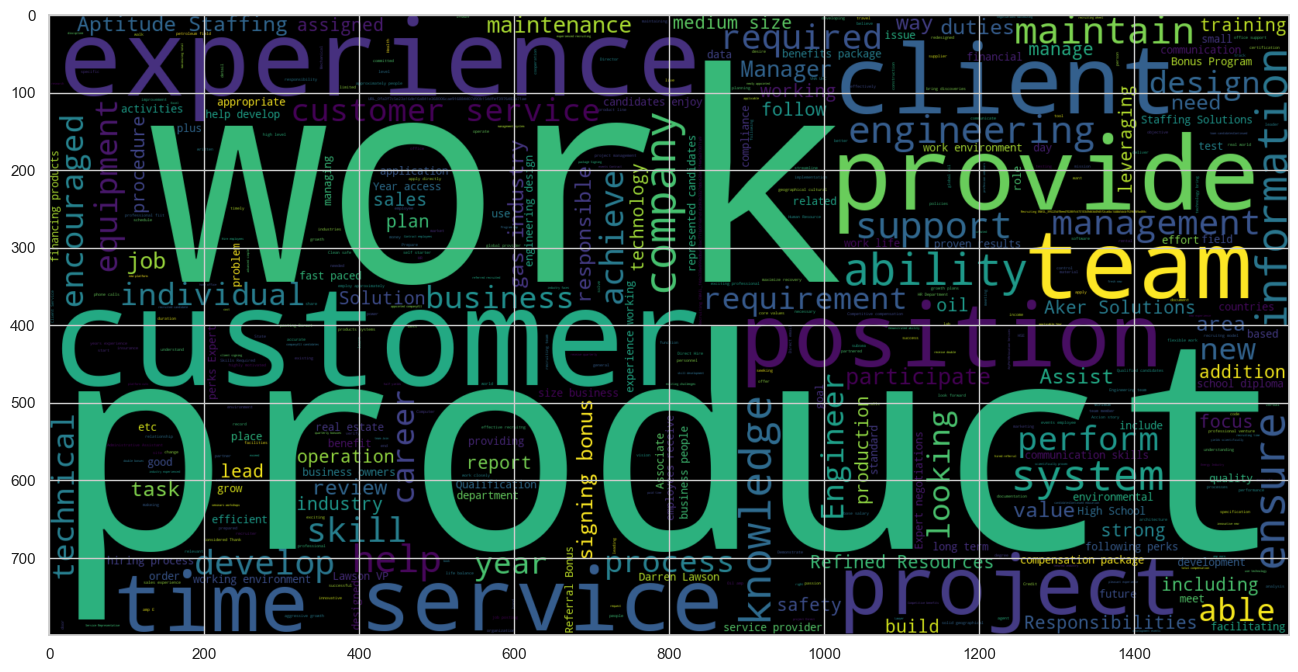

In [57]:
STOPWORDS=STOP_WORDS
plt.figure(figsize=(16,14))
wc=WordCloud(min_font_size=3,max_words=3000,width=1600,height=800,stopwords=STOPWORDS).generate(str(" ".join(fraudjob_text_cleaned)))
plt.imshow(wc,interpolation='bilinear')

C:\Users\Bindu Priyanka\AppData\Local\Temp\ipykernel_25128\731786032.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_counts, y=top_words, palette="viridis")


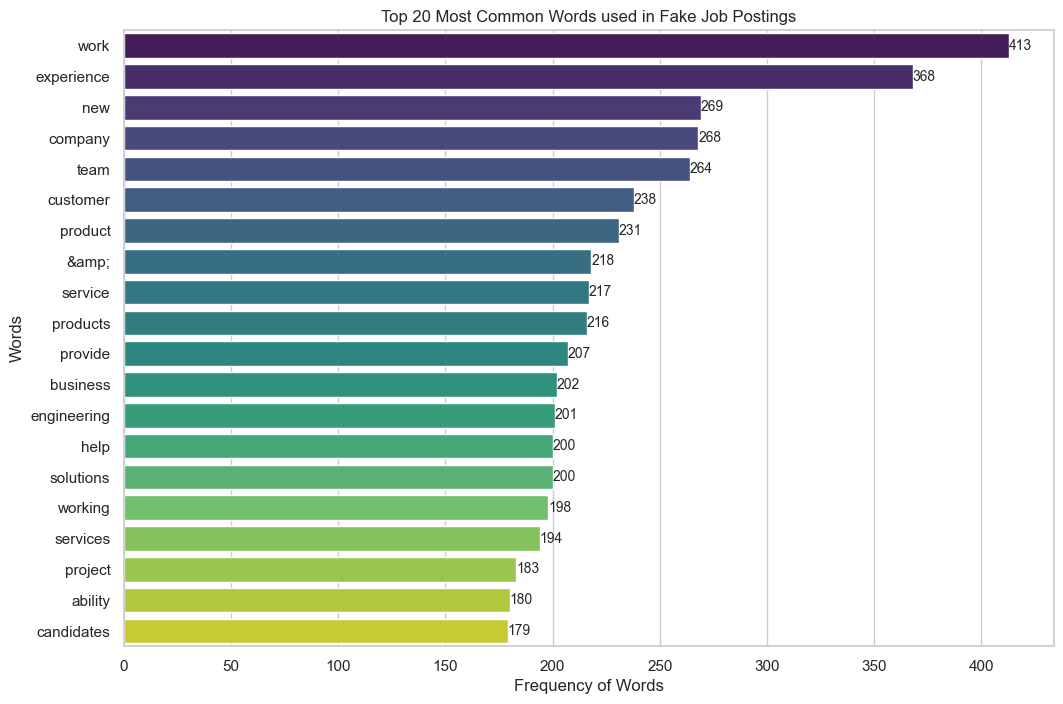

In [58]:
def clean_and_count_words(text, top_n=20):
    combined_text = " ".join(text)
    words = combined_text.split()
    cleaned_words = [word.lower() for word in words if word.lower() not in STOPWORDS and 'nan' not in word and '-' not in word]
    word_counts = Counter(cleaned_words)
    top_words = [word[0] for word in word_counts.most_common(top_n)]
    top_counts = [word[1] for word in word_counts.most_common(top_n)]
    return top_words, top_counts
top_words, top_counts = clean_and_count_words(fraudjob_text_cleaned, top_n=20)

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
ax = sns.barplot(x=top_counts, y=top_words, palette="viridis")

for i, v in enumerate(top_counts):
    ax.text(v, i, str(v), ha='left', va='center', fontsize=10)

plt.title('Top 20 Most Common Words used in Fake Job Postings')
plt.xlabel("Frequency of Words")
plt.ylabel("Words")
plt.show()

These are the words that were present in non-fraudulent job postings

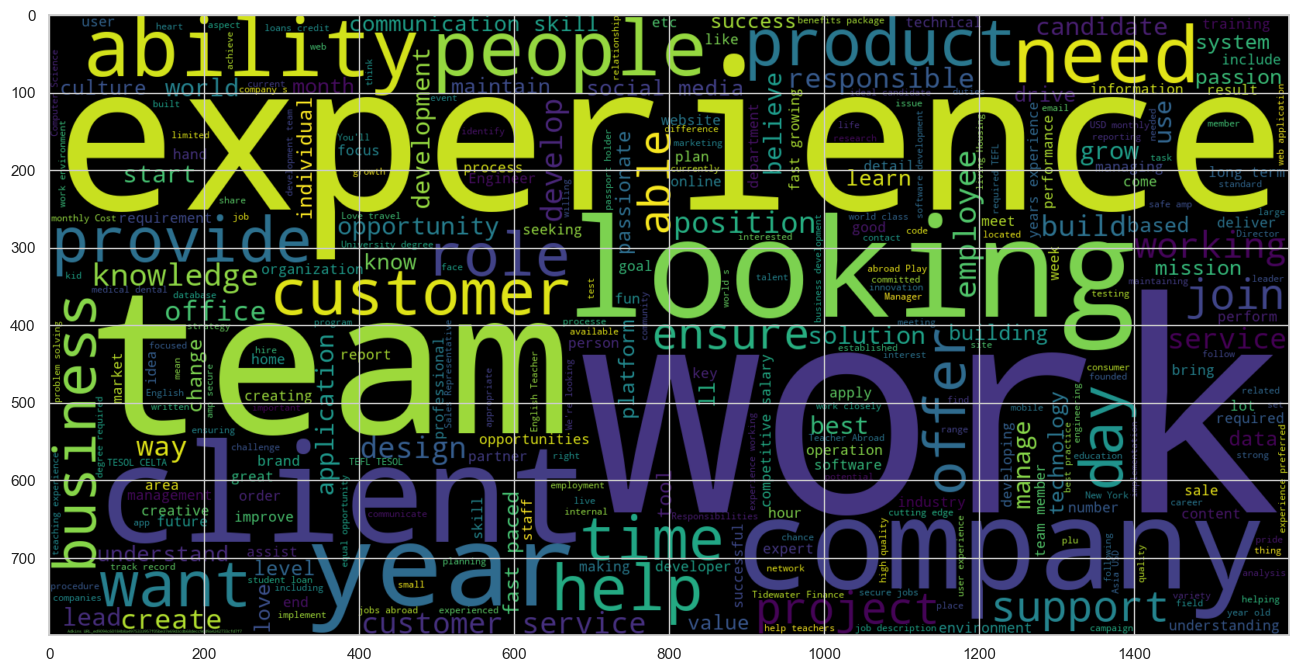

In [59]:
plt.figure(figsize=(16,14))
wc=WordCloud(min_font_size=3,max_words=3000,width=1600,height=800,stopwords=STOPWORDS).generate(str(" ".join(realjob_text_cleaned)))
plt.imshow(wc,interpolation='bilinear')

C:\Users\Bindu Priyanka\AppData\Local\Temp\ipykernel_25128\1448807683.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_counts, y=top_words, palette="deep")


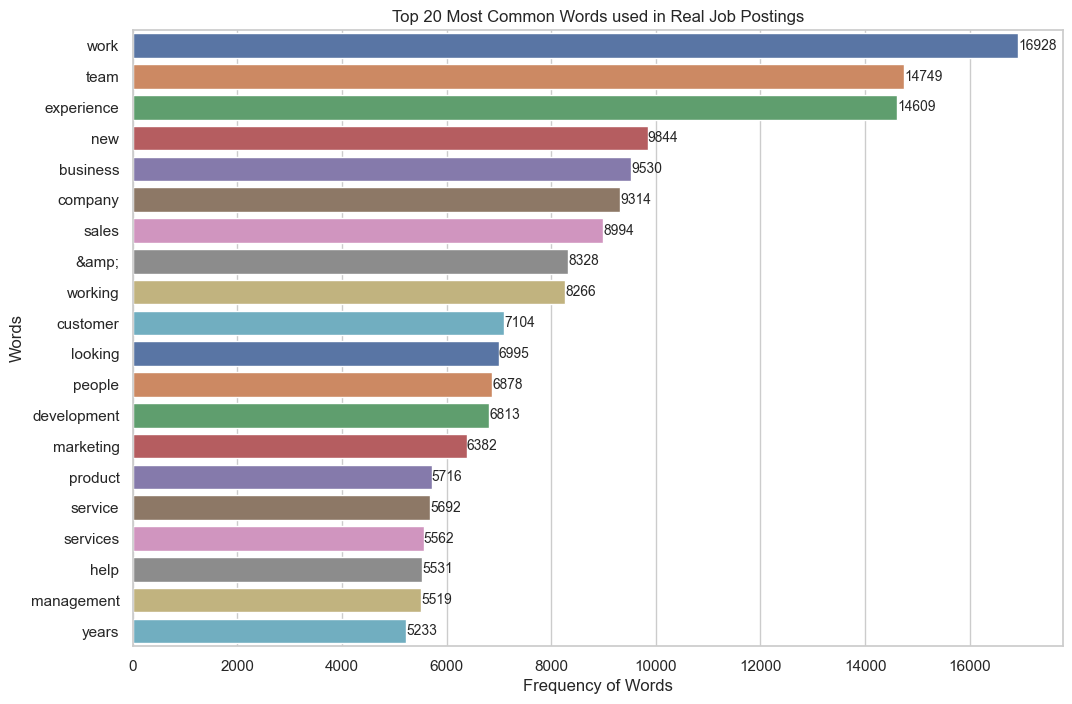

In [60]:
def clean_and_count_words(text, top_n=20):
    combined_text = " ".join(text)
    words = combined_text.split()
    cleaned_words = [word.lower() for word in words if word.lower() not in STOPWORDS and '-' not in word]
    word_counts = Counter(cleaned_words)
    top_words = [word[0] for word in word_counts.most_common(top_n)]
    top_counts = [word[1] for word in word_counts.most_common(top_n)]
    return top_words, top_counts

top_words, top_counts = clean_and_count_words(realjob_text_cleaned, top_n=20)

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
ax = sns.barplot(x=top_counts, y=top_words, palette="deep")

for i, v in enumerate(top_counts):
    ax.text(v, i, str(v), ha='left', va='center', fontsize=10)

plt.title('Top 20 Most Common Words used in Real Job Postings')
plt.xlabel("Frequency of Words")
plt.ylabel("Words")
plt.show()

After creating a word cloud, it was found that the job postings had similar behavioral content, but the genuine ones were more specific to the role.

Based on these insights, we now know that it is possible to find out which job postings are fake and which are not. 

But in these unprecedented times, where hundreds of individuals are being laid off every day, job seekers are desperate. 

The scammers are using this desperation to put out more and more fake job advertisements. 

Hence, we need more of these algorithms and tools being used on job search websites like LinkedIn, Glassdoor and Indeed so that these fake postings are filtered out, and the job-seekers only see the genuine ones.

In [61]:
!pip install spacy && python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 163.8 kB/s eta 0:01:18
     --------------------------------------- 0.0/12.8 MB 178.6 kB/s eta 0:01:12
     --------------------------------------- 0.1/12.8 MB 252.2 kB/s eta 0:00:51
     --------------------------------------- 0.1/12.8 MB 500.5 kB/s eta 0:00:26
     - -------------------------------------- 0.4/12.8 MB 1.3 MB/s eta 0:00:10
     --- ------------------------------------ 1.0/12.8 MB 2.9 MB/s eta 0:00:05
     -------- ------------------------------- 2.7/12.8 MB 7.0 MB/s eta 0:00:02
     ------------- ------------


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Bindu Priyanka\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Bindu Priyanka\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Predictive Analysis

Before splitting the data, we need to make some final changes to the data, after which we will be splitting it. The ‘description’ column had to be cleaned into tokens. This is done with the help of spacy and nltk libraries. In the following piece of code, the ‘description’ column has been converted into tokens, and those tokens have been used to create one hot column using sklearn’s CountVectorizer. Also, categorical columns like ‘employment_type,’ ‘required_eduacation,’ ‘required_experience,’ ‘industry,’ and ‘function’ have been converted into one-hot vectors.

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [63]:
pip install spacy


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Bindu Priyanka\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [65]:
pip install nltk

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
      --------------------------------------- 0.0/1.5 MB 217.9 kB/s eta 0:00:07
     - -------------------------------------- 0.0/1.5 MB 245.8 kB/s eta 0:00:06
     -- ------------------------------------- 0.1/1.5 MB 595.3 kB/s eta 0:00:03
     ------------- -------------------------- 0.5/1.5 MB 2.1 MB/s eta 0:00:01
     ---------------------------------------  1.5/1.5 MB 5.3 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/269.5 kB ? eta -:--:--
   ---------------------------------------- 269.5/269.5 kB 8.4 MB/s eta 0:00:00
Note: you 


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Bindu Priyanka\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [66]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
english_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Bindu
[nltk_data]     Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [69]:
from nltk.corpus import stopwords
import string

STOPLIST = set(stopwords.words('english'))
SYMBOLS = " ".join(string.punctuation).split(" ")



In [71]:
def clean(text):
    text=text.lower()
    obj=re.compile(r"<.*?>")                     #removing html tags
    text=obj.sub(r" ",text)
    obj=re.compile(r"https://\S+|http://\S+")    #removing url
    text=obj.sub(r" ",text)
    obj=re.compile(r"[^\w\s]")                   #removing punctuations
    text=obj.sub(r" ",text)
    obj=re.compile(r"\d{1,}")                    #removing digits
    text=obj.sub(r" ",text)
    obj=re.compile(r"_+")                        #removing underscore
    text=obj.sub(r" ",text)
    obj=re.compile(r"\s\w\s")                    #removing single character
    text=obj.sub(r" ",text)
    obj=re.compile(r"\s{2,}")                    #removing multiple spaces
    text=obj.sub(r" ",text)
   
    
    stemmer = SnowballStemmer("english")
    text=[stemmer.stem(word) for word in text.split() if word not in stop]
    
    return " ".join(text)

In [73]:
def tokenizetext(sample):
    text = sample.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    tokens = parser(text)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

In [74]:
vectorizer = CountVectorizer(tokenizer = tokenizetext, ngram_range = (1,3), min_df = 0.06)

In [75]:
vectorizer_features = vectorizer.fit_transform(df1['description'])

NameError: name 'df1' is not defined

In [ ]:
vectorizer_features.shape

(11272, 3)

In [ ]:
vectorizer_features

<11272x3 sparse matrix of type '<class 'numpy.int64'>'
	with 33816 stored elements in Compressed Sparse Row format>

In [ ]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

if hasattr(vectorizer, 'get_feature_names_out'):
    feature_names = vectorizer.get_feature_names_out()
else:
    feature_names = sorted(vectorizer.vocabulary_, key=vectorizer.vocabulary_.get)

vectorized_df = pd.DataFrame(vectorizer_features.todense(), columns=feature_names)

df_vectorized = pd.concat([df1, vectorized_df], axis=1)


In [77]:
df_vectorized.drop('description', axis = 1, inplace = True)
df_vectorized.dropna(inplace=True)

NameError: name 'df_vectorized' is not defined

In [76]:
df_vectorized.head()

NameError: name 'df_vectorized' is not defined

In [ ]:
columns_to_1_hot = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']

for column in columns_to_1_hot:
    encoded = pd.get_dummies(df_vectorized[column])
    df_vectorized = pd.concat([df_vectorized, encoded], axis = 1)

In [ ]:
columns_to_1_hot += ['title', 'city', 'country_name']
df_vectorized.drop(columns_to_1_hot, axis = 1, inplace = True)

split data into 95% train and 5% test

In [ ]:
target = df_vectorized['fraudulent']
features = df_vectorized.drop('fraudulent', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.05, stratify = target, random_state=42)

## Machine Learning Algorithm using Random Forest

In [ ]:
Model_Score = []
Model_Name = []

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
n_estimators_range = [1, 2, 4, 8, 16, 32, 64, 100, 200]
param_grid_rf = dict(n_estimators = n_estimators_range)
grid_rf = GridSearchCV(rf, param_grid_rf, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

In [ ]:
grid_rf.fit(X_train, y_train)
print (grid_rf.best_score_)
print (grid_rf.best_params_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


0.9324720299639692
{'n_estimators': 200}


In [ ]:
rf_pred = grid_rf.predict(X_test)
roc_auc_score(y_test, rf_pred)
print(f"ROC-AUC Score: {roc_auc}")
print (classification_report(y_test, rf_pred))

ROC-AUC Score: 0.7282137864375702
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       552
           1       1.00      0.50      0.67        12

    accuracy                           0.99       564
   macro avg       0.99      0.75      0.83       564
weighted avg       0.99      0.99      0.99       564



ROC-AUC score is 0.72 and one can predict if a job posting is fake or not 73% of the time.

This predictive analysis is very much useful for job search websites like LinkedIn and Glassdoor, which can help them filter such fake job postings.